In [ ]:
# Download the driver 

In [1]:
!pip install cassandra-driver

     |████████████████████████████████| 4.1 MB 2.8 MB/s eta 0:00:01


In [ ]:
#import the CASSANDRA library

In [9]:
import cassandra 
print (cassandra.__version__)

3.25.0


In [ ]:
#Establisg the connection with CASSANDRA Cloud.

In [93]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': '/Users/testtest/MySQL/Cassandra/secure-connect-Manish.zip'
}
auth_provider = PlainTextAuthProvider('fOCYuCIpINLwbltMboQFxOpz','uyGfGOwti+kGjbT.pWXEJ8aG+m1wtbZkF9Ekn9ah+4qmb+5l65idjqYFKOZBq+Z_ucLAUrxc4UNDA.2fvBGhW.NU4LohZC31khZWi5f5nf0inoNKZjIgerrFHG59G9_E')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
    print(row[0])
else:
    print("An error occurred.")

4.0.0.6813


In [9]:
pwd

'/Users/testtest/MySQL/Cassandra'

In [10]:
ls

Cassandra.ipynb            secure-connect-manish.zip


In [ ]:
# Creating Key Space.

row = session.execute("CREATE KEYSPACE test WITH replication = {'class': 'SimpleStrategy', 'replication_factor' : 3}").one()
print(row)

In [20]:
# lets list all the exiating keyspace 

row = session.execute("SELECT * from system_schema.keyspaces").one()
print(row)

Row(keyspace_name='system_auth', durable_writes=True, graph_engine=None, replication=OrderedMapSerializedKey([('class', 'org.apache.cassandra.locator.NetworkTopologyStrategy'), ('us-east-1', '3')]))


In [29]:
# creating table

from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': '/Users/testtest/MySQL/Cassandra/secure-connect-Manish.zip'
}
auth_provider = PlainTextAuthProvider('fOCYuCIpINLwbltMboQFxOpz','uyGfGOwti+kGjbT.pWXEJ8aG+m1wtbZkF9Ekn9ah+4qmb+5l65idjqYFKOZBq+Z_ucLAUrxc4UNDA.2fvBGhW.NU4LohZC31khZWi5f5nf0inoNKZjIgerrFHG59G9_E')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("CREATE TABLE test.emp_1(emp_id int PRIMARY KEY,emp_name text,emp_city text,emp_sal varint,emp_phone varint);").one()
print(row)

None


In [32]:
#inserting data into table 

row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone)values(1234,'bangalore','manish',213131);").one()
print(row)

None


In [38]:
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(2234,'Delhi','Sunil',12345,10000);").one()
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(3334,'Patna','Ankit',342134,20000);").one()
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(4434,'Bombay','Rajeev',324567,30000);").one()
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(5534,'Bhopal','Sanjeev',765456,40000);").one()
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(6634,'Pune','Santosh',987654,50000);").one()
print(row)

None


In [37]:
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(2234,'London','Gray',12345,90000);").one()
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(3334,'Paris','Paul',342134,26000);").one()
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(4434,'Wuhan','Rajeev',324567,65000);").one()
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(5534,'Phillipines','Dave',765456,72000);").one()
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(6634,'Gaza','Fajar',987654,51000);").one()
print(row)

None


In [44]:
rows=session.execute("select * from test.emp;")
for row in rows:
    
    print ('emp_id: {}, city:{}, name:{}, phone:{},sal:{} '.format(row[0],row[1], row[2], row[3],row[4]))

emp_id: 2234, city:Delhi, name:Sunil, phone:12345,sal:10000 
emp_id: 4434, city:Wuhan, name:Rajeev, phone:324567,sal:65000 
emp_id: 3334, city:Paris, name:Paul, phone:342134,sal:26000 
emp_id: 5534, city:Phillipines, name:Dave, phone:765456,sal:72000 
emp_id: 6634, city:Gaza, name:Fajar, phone:987654,sal:51000 
emp_id: 1234, city:bangalore, name:manish, phone:213131,sal:None 


In [3]:
row = session.execute("insert into test.emp(emp_id,emp_city,emp_name,emp_phone,emp_sal)values(8976,'Patna','Sanjeev',879610,10000);").one()
print(row)

None


In [6]:
rows=session.execute("select * from test.emp;")

for row in rows:
    #print(row)
    print ('StudentID: {} Name:{} Age:{} Marks:{}'.format(row[0],row[1], row[2], row[3]))

StudentID: 2234 Name:Delhi Age:Sunil Marks:12345
StudentID: 4434 Name:Wuhan Age:Rajeev Marks:324567
StudentID: 8976 Name:Patna Age:Sanjeev Marks:879610
StudentID: 3334 Name:Paris Age:Paul Marks:342134
StudentID: 5534 Name:Phillipines Age:Dave Marks:765456
StudentID: 6634 Name:Gaza Age:Fajar Marks:987654
StudentID: 1234 Name:bangalore Age:manish Marks:213131


In [19]:
#session.execute("CREATE INDEX ON test.emp(emp_sal); ")

rows=session.execute("select * from test.emp WHERE emp_sal = 10000 ;")
for row in rows:
   
    print ('emp_id: {}, City:{}, Name:{} ,Phone:{},Salary{}'.format(row[0],row[1], row[2], row[3],row[4]))

emp_id: 2234, City:Delhi, Name:Sunil ,Phone:12345,Salary10000
emp_id: 8976, City:Patna, Name:Sanjeev ,Phone:879610,Salary10000


In [55]:
rows = session.execute("select * from test.emp WHERE emp_id = 2234 and emp_city = 'delhi' ALLOW FILTERING ;")

for row in rows:
    print(row)
    #print("Emp_id:{},City:{},Name:{},Phone:{},Salary:{}".format(row[0],row[1],row[2],row[3],row[4]))

In [53]:
rows = session.execute("select count(*) from test.emp ;")

for i in rows:
    
    print(i)

Row(count=7)


In [40]:
rows = session.execute("select min(emp_sal) from test.emp ;")

for i in rows:
    print(i)

Row(system_min_emp_sal=10000)


In [42]:
rows = session.execute("select AVG(emp_sal) from test.emp ;")

for i in rows:
    print(i)

Row(system_avg_emp_sal=39000)


In [44]:
rows = session.execute("select SUM(emp_sal) from test.emp ;")

for i in rows:
    print(i)

Row(system_sum_emp_sal=234000)


In [47]:
rows = session.execute("select * from test.emp WHERE emp_id in (3334,6634,234) ;")

for i in rows:
    print(i)
   # print(("Emp_id:{},City:{},Name:{},Phone:{},Salary:{}".format(row[0],row[1],row[2],row[3],row[4])))

Row(emp_id=3334, emp_city='Paris', emp_name='Paul', emp_phone=342134, emp_sal=26000)
Row(emp_id=6634, emp_city='Gaza', emp_name='Fajar', emp_phone=987654, emp_sal=51000)


In [57]:
rows = session.execute("select * from test.emp limit 4 ALLOW FILTERING ;")

for i in rows:
    print(i)

Row(emp_id=2234, emp_city='Delhi', emp_name='Sunil', emp_phone=12345, emp_sal=10000)
Row(emp_id=4434, emp_city='Wuhan', emp_name='Rajeev', emp_phone=324567, emp_sal=65000)
Row(emp_id=8976, emp_city='Patna', emp_name='Sanjeev', emp_phone=879610, emp_sal=10000)
Row(emp_id=3334, emp_city='Paris', emp_name='Paul', emp_phone=342134, emp_sal=26000)


In [62]:
rows = session.execute("select * from test.emp where emp_sal>10000 ;")

for i in rows:
    print(i)

Row(emp_id=4434, emp_city='Wuhan', emp_name='Rajeev', emp_phone=324567, emp_sal=65000)
Row(emp_id=3334, emp_city='Paris', emp_name='Paul', emp_phone=342134, emp_sal=26000)
Row(emp_id=5534, emp_city='Phillipines', emp_name='Dave', emp_phone=765456, emp_sal=72000)
Row(emp_id=6634, emp_city='Gaza', emp_name='Fajar', emp_phone=987654, emp_sal=51000)


In [78]:
rows = session.execute("select * from test.emp where emp_name= 's%' ALLOW FILTERINg ;").one()

#for i in rows:
#    print(i)

In [79]:
rows=session.execute("select * from test.emp where emp_id = 2234 AND emp_name = 'sunil' ORDER BY emp_sal ALLOW  filtering;").one()
#for row in rows:
  #  print(row)
    #print ('StudentID: {} Name:{} Age:{} Marks:{}'.format(row[0],row[1], row[2], row[3]))

InvalidRequest: Error from server: code=2200 [Invalid query] message="Order by is currently only supported on the clustered columns of the PRIMARY KEY, got emp_sal"

In [81]:
session.execute("delete from test.emp where emp_id = 5534 ;")
print("deleted")

deleted


In [83]:
rows = session.execute("select * from test.emp")

for row in rows:
    print(row)

Row(emp_id=2234, emp_city='Delhi', emp_name='Sunil', emp_phone=12345, emp_sal=10000)
Row(emp_id=4434, emp_city='Wuhan', emp_name='Rajeev', emp_phone=324567, emp_sal=65000)
Row(emp_id=8976, emp_city='Patna', emp_name='Sanjeev', emp_phone=879610, emp_sal=10000)
Row(emp_id=3334, emp_city='Paris', emp_name='Paul', emp_phone=342134, emp_sal=26000)
Row(emp_id=6634, emp_city='Gaza', emp_name='Fajar', emp_phone=987654, emp_sal=51000)
Row(emp_id=1234, emp_city='bangalore', emp_name='manish', emp_phone=213131, emp_sal=None)


In [84]:
# Drop keyspace
try:
    query = "DROP KEYSPACE test1"
    session.execute(query)
    print('Keyspace test1 dropped.')
except Exception as e:
    print('excetion occured ',e)

excetion occured  Error from server: code=2100 [Unauthorized] message="Missing correct permission on test1."


In [87]:
# Alter Keyspace
try:
    query = "ALTER KEYSPACE test1 WITH replication = {'class':'SimpleStrategy', 'replication_factor' : 1};"
    session.execute(query)
    print('Keyspace altered.')
except Exception as e:
    print('excetion occured ',e)

excetion occured  Error from server: code=2100 [Unauthorized] message="Missing correct permission on test1."


In [108]:
# Alter Table add column
try:
    query = "ALTER TABLE test.emp ADD email set<text> "
    session.execute(query)
    print('Table altered.')
except Exception as e:
    print('excetion occured ',e)

Table altered.


In [90]:
try:
    query = "ALTER TABLE test.emp ADD address set<text>"
    session.execute(query)
    print('Table altered.')
except Exception as e:
    print('excetion occured ',e)

Table altered.


In [104]:
# Alter Table drop column
try:
    query = "ALTER TABLE test.emp DROP email"
    session.execute(query)
    print('Table altered.')
except Exception as e:
    print('excetion occured ',e)

Table altered.


In [91]:
# Creating Table
try:
    query = """CREATE TABLE test.manish( 
               emp_id int PRIMARY KEY,
               emp_name text,
               emp_city text,
               emp_sal varint,
               emp_phone varint)
            """
    session.execute(query)
    print('Table created.')
except Exception as e:
    print('excetion occured ',e)

Table created.


In [92]:
try:
    query = "DROP table test.manish"
    session.execute(query)
    print("Tables dropped")
    
except Exception as e:
    print(e)

errors={'5506fe8d-63a7-467f-be63-c6d0f569a3de-us-east-1.db.astra.datastax.com:29042:9a21374d-bd0d-49af-a5e2-ceb04e6d25c5': 'Client request timeout. See Session.execute[_async](timeout)'}, last_host=5506fe8d-63a7-467f-be63-c6d0f569a3de-us-east-1.db.astra.datastax.com:29042:9a21374d-bd0d-49af-a5e2-ceb04e6d25c5


All done! Bye, For Now


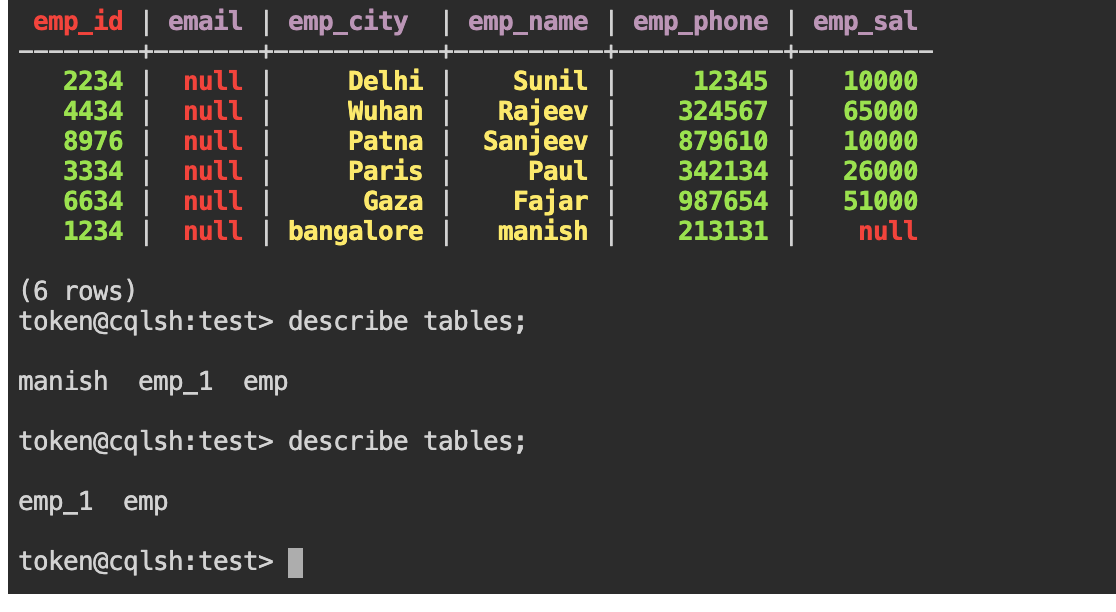

In [97]:
# Actually table has been dropped 
# image from CASSANDRA cloud workbech

from IPython.display import Image

print("All done! Bye, For Now")

# Load image from local storage
Image(filename = "screen.png", width = 900, height = 300)

In [100]:
# Creating index on table
try:
    query = "CREATE INDEX emp_index on test.emp(emp_city)"
    session.execute(query)
    print('Index created.')
except Exception as e:
    print('excetion occured ',e)

Index created.


In [109]:
# Update record from table
try:
    query = "UPDATE test.emp SET email='manish@gmail.com' WHERE emp_id=1234 ;"
    session.execute(query)
    print('record updated')
except Exception as e:
    print('excetion occured ',e)

excetion occured  Error from server: code=2200 [Invalid query] message="Invalid STRING constant (manish@gmail.com) for "email" of type set<text>"


In [117]:
# Update table to add emails
try:
    emails = {'manish5@gmail.com'}
    query = "UPDATE test.emp SET email={} WHERE emp_id= 6634".format(emails)
    session.execute(query)
    print('record updated')
except Exception as e:
    print('excetion occured ',e)

record updated
